# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations: There are 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:Different dtypes are int,float and objetcs


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:There is no missing values in the data


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations: Min time - 20.00, Max time- 35.00 and mean time - 2.737197e+01 for food preparation once order is placed


### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: 736 orders were not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

OrderId

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
# Write the code here
unique_orderId = df['order_id'].nunique()
unique_customerId = df['customer_id'].nunique()
unique_restaurant_name = df['restaurant_name'].nunique()
unique_cuisine_type = df['cuisine_type'].nunique()


In [ ]:
print(unique_orderId,unique_customerId,unique_restaurant_name,unique_cuisine_type)

1898 1200 178 14


In [ ]:
df.groupby('restaurant_name')['order_id'].sum().max()

323578315

Cusine Type

<Axes: xlabel='cuisine_type', ylabel='count'>

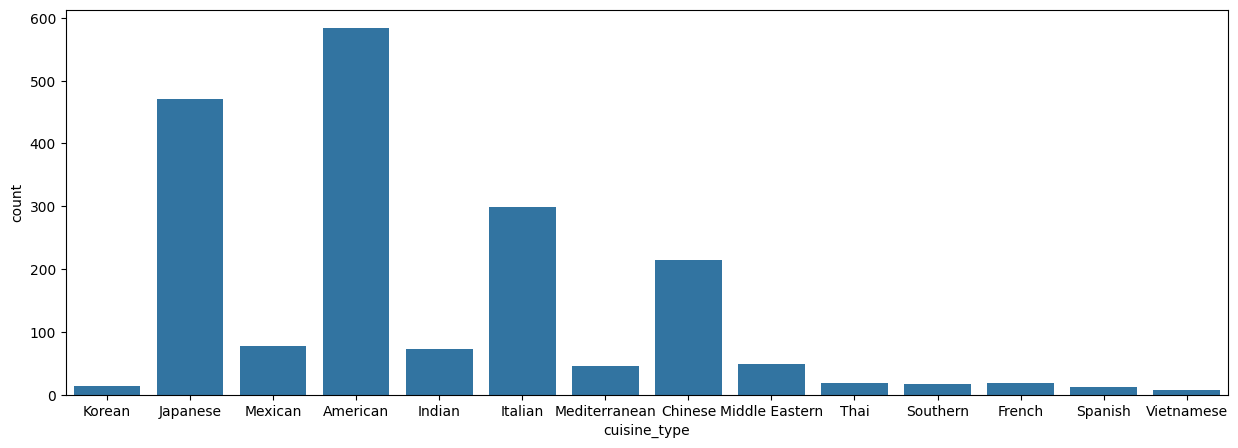

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')

Cost Of Order

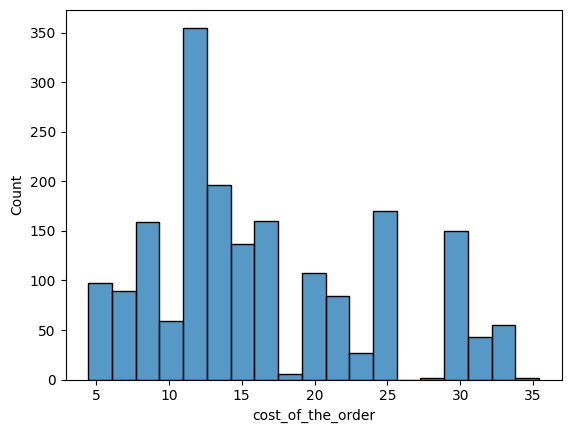

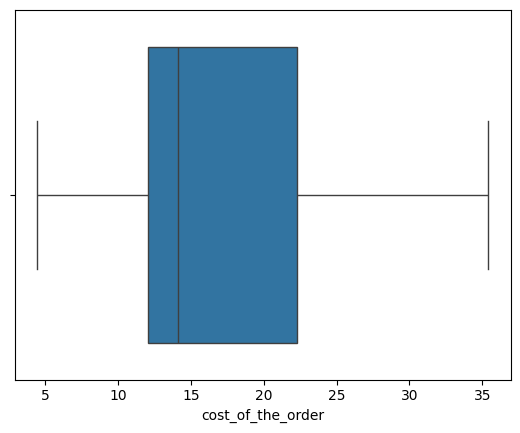

In [ ]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

Day Of The Week

2


<Axes: xlabel='day_of_the_week', ylabel='count'>

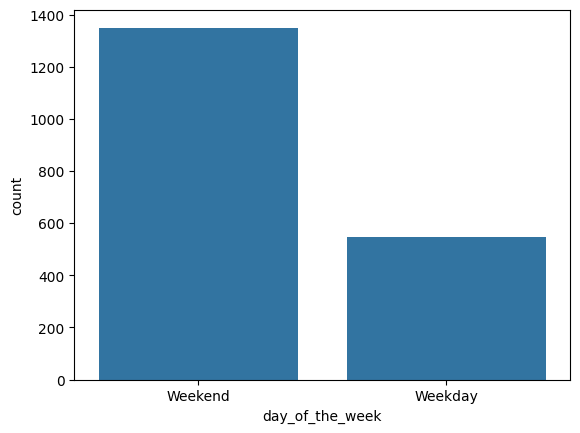

In [ ]:
print(df['day_of_the_week'].nunique()) # Checking the unique values of day of the week
sns.countplot(data=df,x='day_of_the_week')

4


<Axes: xlabel='rating', ylabel='count'>

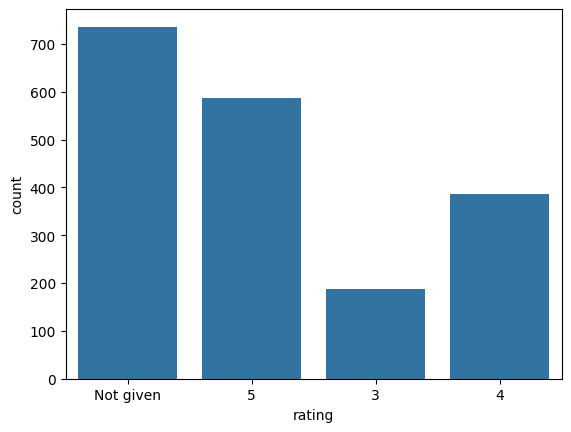

In [ ]:
print(df['rating'].nunique()) # Checking the unique values of rating
sns.countplot(data=df,x='rating')

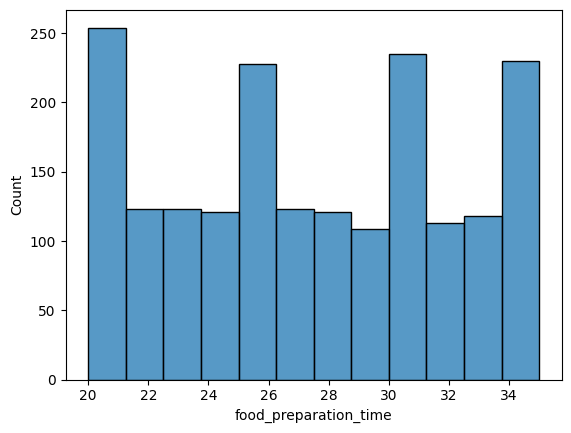

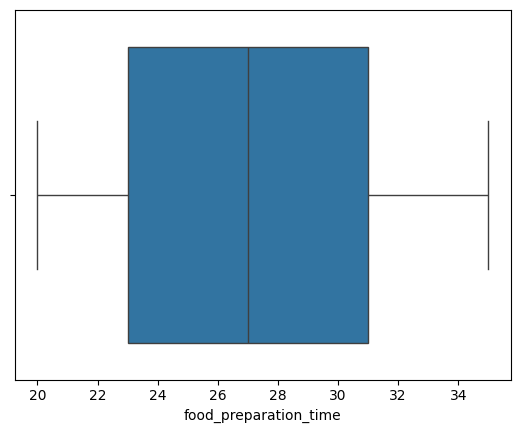

In [ ]:
sns.histplot(data=df,x='food_preparation_time') # Histogram for food preparation time
plt.show()
sns.boxplot(data=df,x='food_preparation_time') # Box plot for food preparation time
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:


*   Shake Shack - 219
*   The Meatball Shop            - 132
*   Blue Ribbon Sushi            - 119
*   Blue Ribbon Fried Chicken      - 96
*   Parm                 - 68



### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Write the code here
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().idxmax()

'American'

#### Observations:
American

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
costly_order = df[df['cost_of_the_order']>20]
percentage = round((len(costly_order)/len(df))*100,2)
percentage

29.24

#### Observations:
29.24% of the orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
round(df['delivery_time'].mean(),2)

24.16

#### Observations:
Mean Order delivery time is 24.16

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Write the code here
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The top three most frequent customers with their IDs
1. 52832 - 13 orders

2. 47440 - 10 orders

3. 83287 - 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

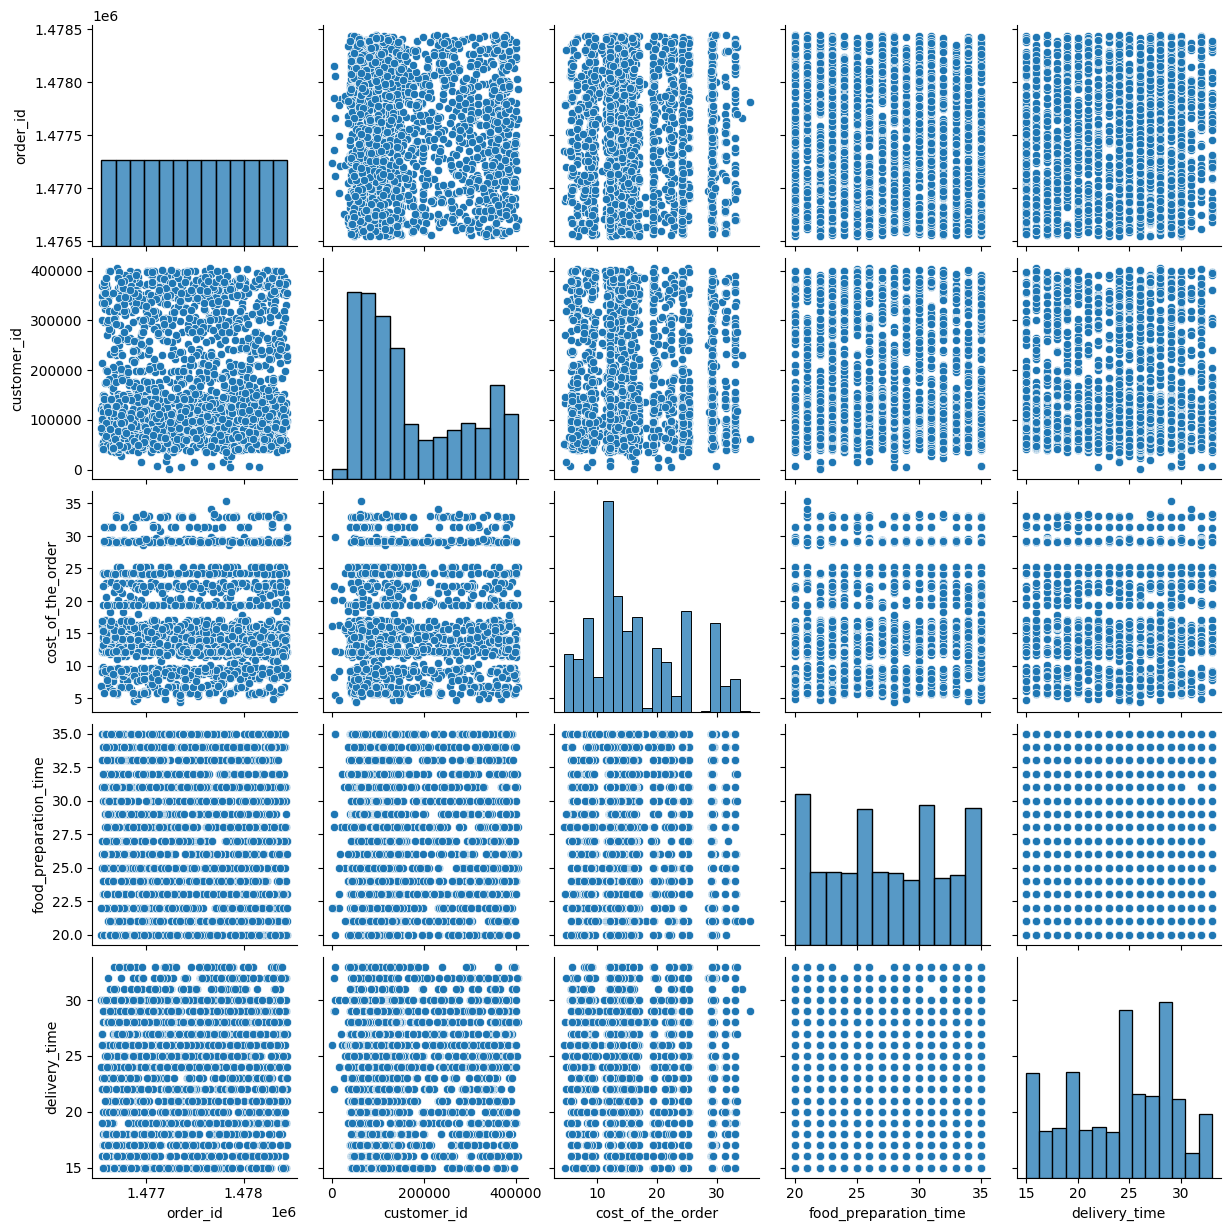

In [ ]:
sns.pairplot(df)

<ipython-input-60-de8511a976a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')


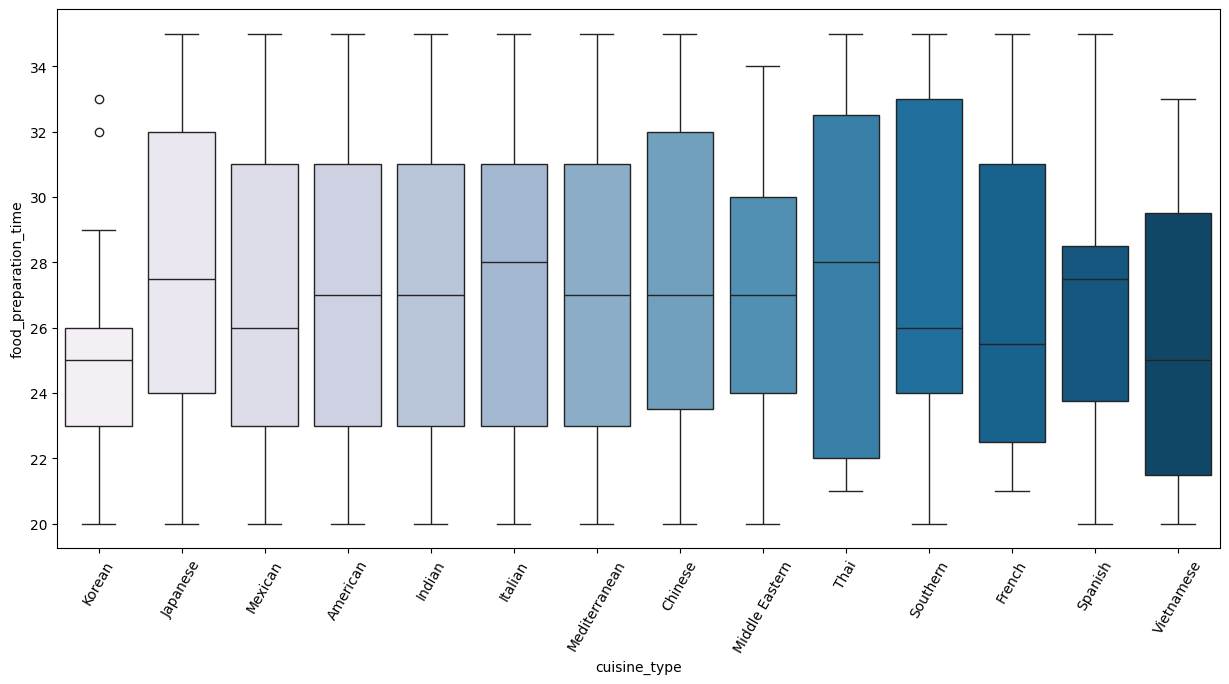

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu') #cuisine vs food preparation time
plt.xticks(rotation = 60)
plt.show()

<ipython-input-59-59316702d994>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')


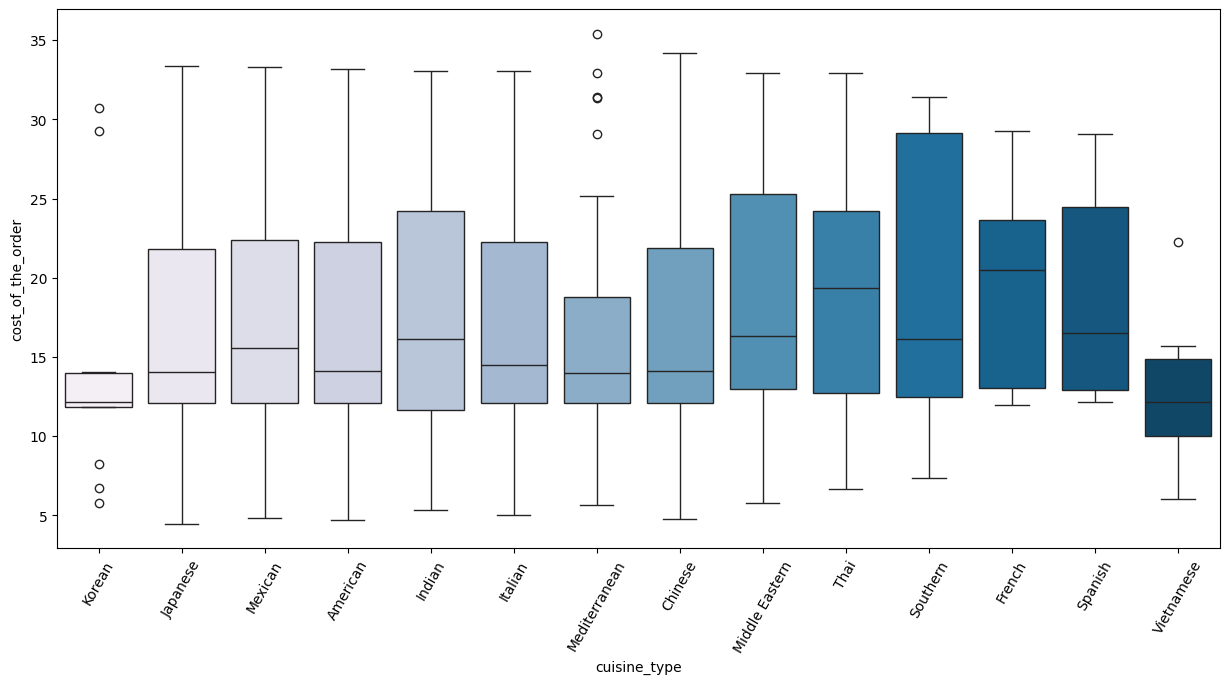

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu') #cuisine vs cost of the order
plt.xticks(rotation = 60)
plt.show()

<ipython-input-61-e10bdbc3bb0b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot


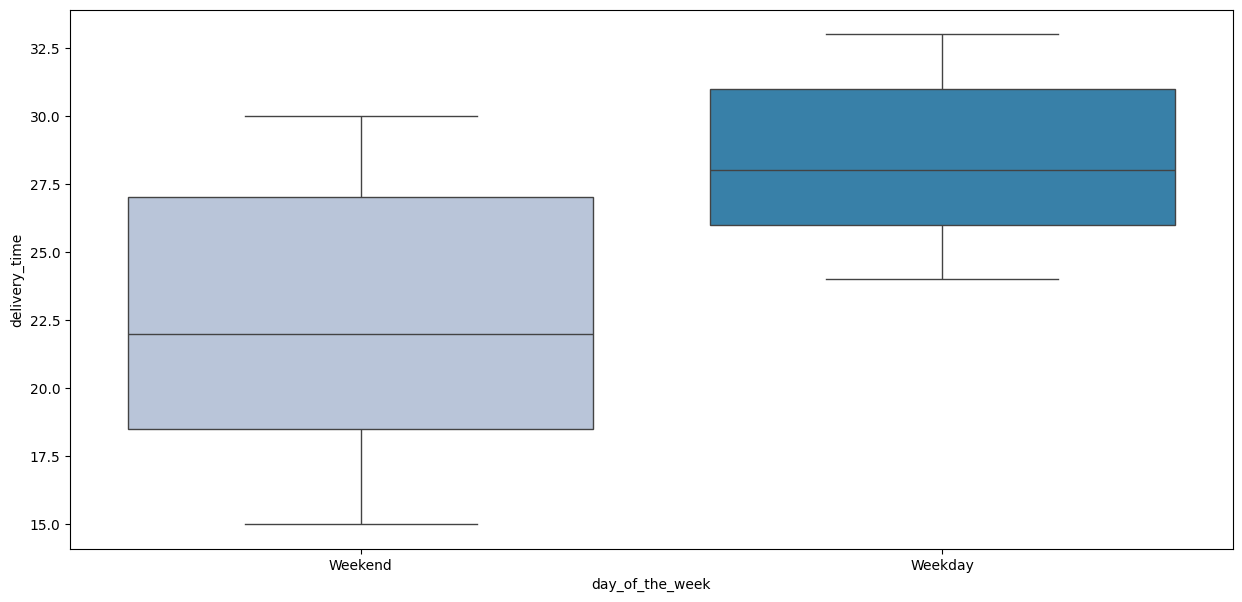

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu') # Day of the week vs delivery time
plt.show()

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

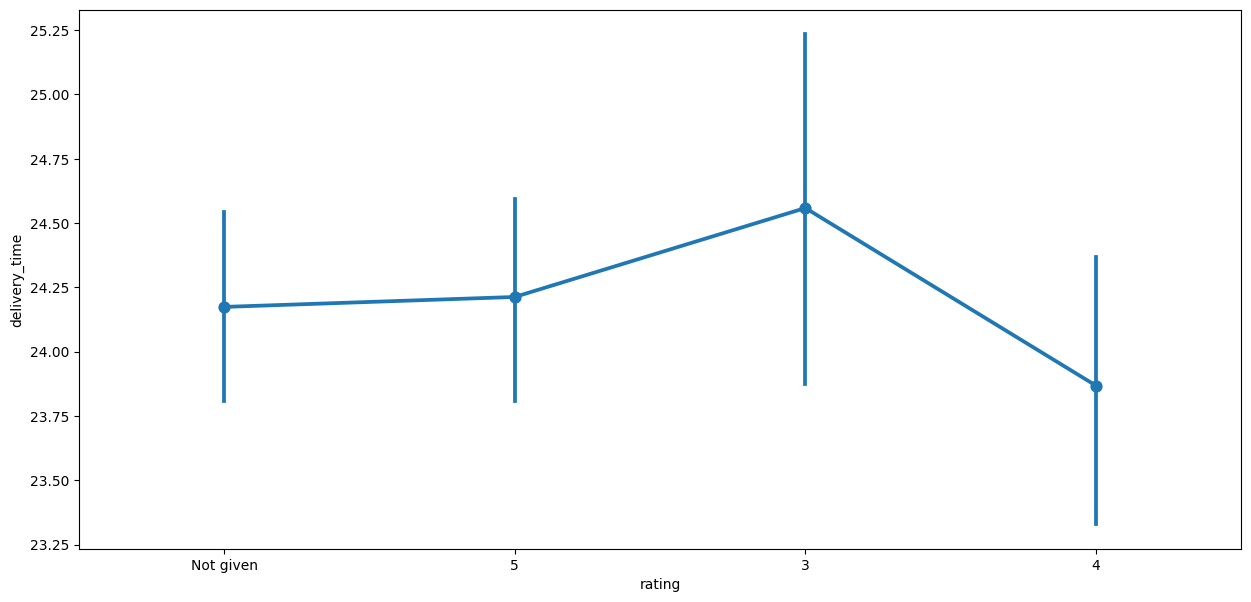

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

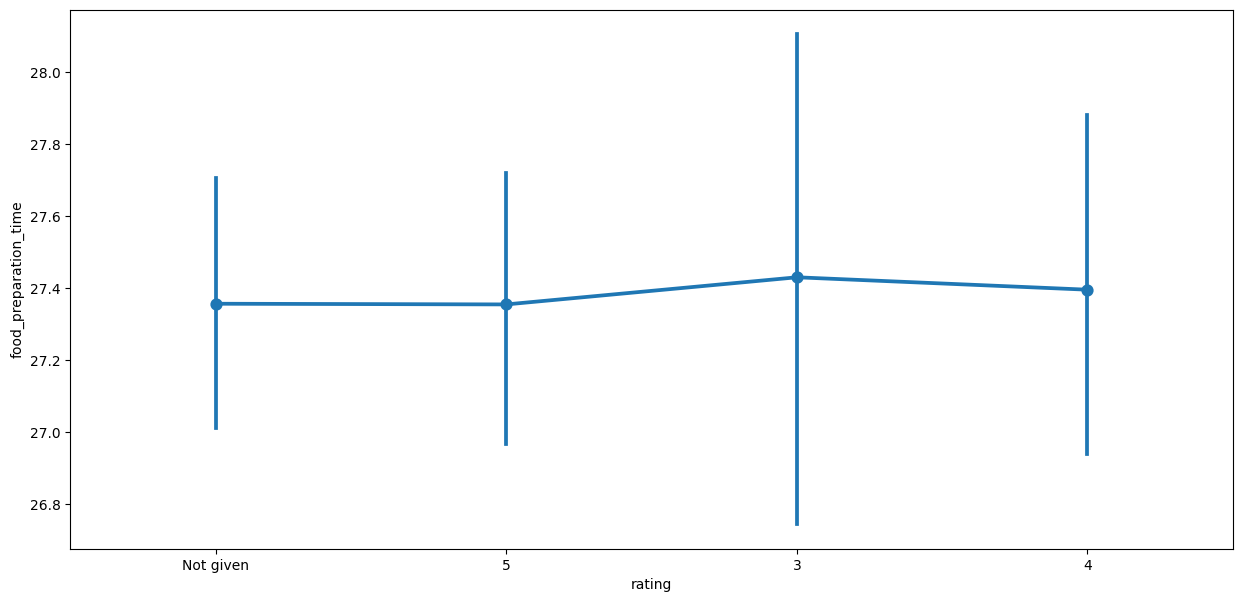

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating',y='food_preparation_time',data=df) #Rating vs food preparation time
plt.show()

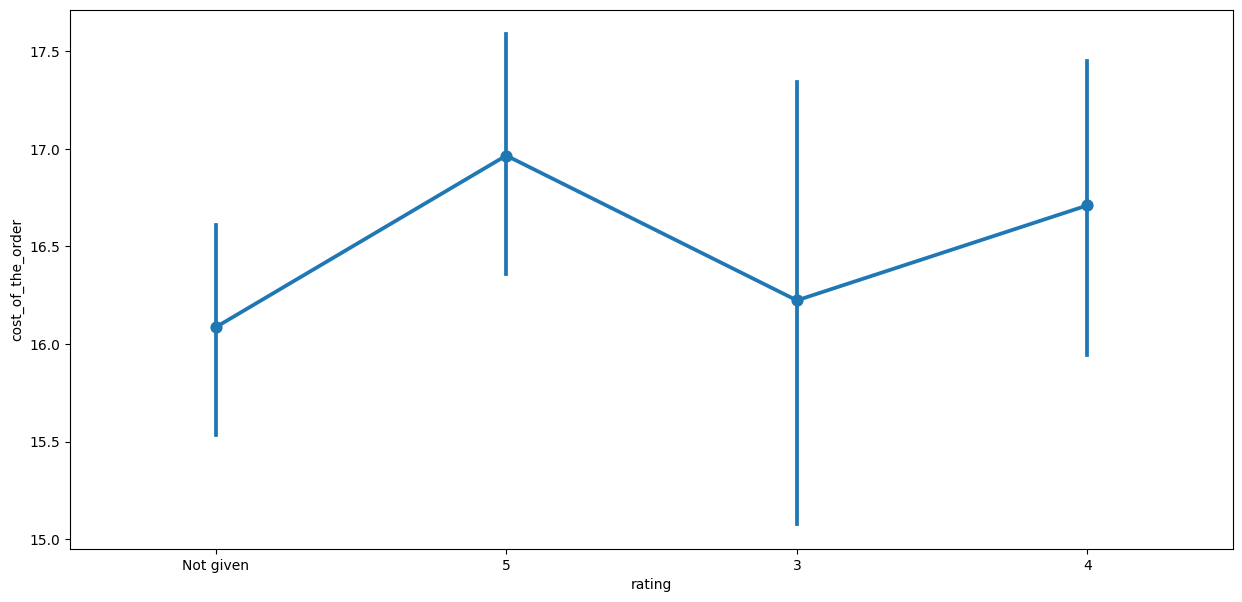

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating',y='cost_of_the_order',data=df)   ## rating vs cost of the order
plt.show()

<Axes: >

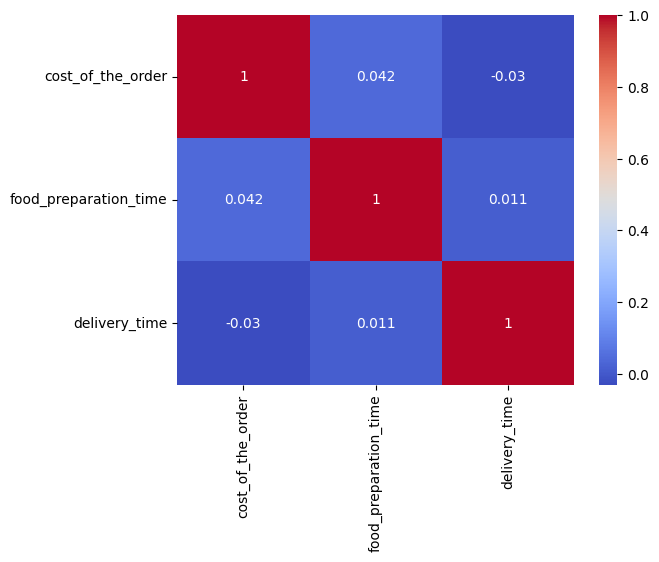

In [ ]:
# Write the code here
import pandas as pd
import seaborn as sns

# Load the CSV file

# Select numerical variables for correlation analysis
numerical_vars = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

# Compute the correlation matrix
corr_matrix = df[numerical_vars].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [84]:
# Write the code here
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


#### Observations:
|index|restaurant\_name|rating|
|---|---|---|
|0|Shake Shack|133|
|1|The Meatball Shop|84|
|2|Blue Ribbon Sushi|73|
|3|Blue Ribbon Fried Chicken|64|
|4|RedFarm Broadway|41|

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [87]:
# Write the code here
revenue_20 = df[df['cost_of_the_order']>20]['cost_of_the_order'].sum()*0.25
revenue_5 =df[df['cost_of_the_order']>5]['cost_of_the_order'].sum()*0.15

total_revenue = revenue_20+revenue_5
round(total_revenue,2)

8379.54

#### Observations:
Total revenue generated by the company is 8379.54

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [91]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

percentage = (len(df[df['total_time']>60])/len(df))*100
round(percentage,2)

10.54

#### Observations:
10.54% of orders takes more than 60 minutes to get delivered from the time order is placed

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [100]:
# Write the code here
weekend_mean = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
weekday_mean = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

In [102]:
print(weekday_mean - weekend_mean)

5.870014357297798


#### Observations:
Yes the mean delivery time varies by 5.87 more on weekday than on weekend

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  In conclusion, by analyzing the total time taken to deliver food, cuisine types, and feedback ratings, restaurants can develop targeted strategies to enhance their operations and improve customer satisfaction. These efforts will ultimately contribute to increased revenue growth and brand reputation.

### Recommendations:

*  Based on the analysis of the data in the `foodhub_order.csv` file, I have identified several insights and recommendations related to improving the business by focusing on reducing the total time taken to deliver food and enhancing customer satisfaction through better cuisine types and feedback ratings.

### Recommendations based on Total Time Taken to Deliver

To reduce the number of orders taking longer than 60 minutes to complete, consider the following actions:

1. Optimize kitchen workflows to minimize delays during food preparation. This may involve reorganizing the kitchen layout or implementing new processes to streamline operations.
2. Monitor and manage employee performance to ensure timely execution of tasks. Consider providing training or incentives to encourage faster service without compromising quality.
3. Evaluate menu items with long cooking times and explore options such as pre-cooked ingredients or alternative dishes that require less preparation time.

### Recommendations based on Cuisine Types

Based on the average total time taken to deliver, some cuisines appear to perform better than others. For example, American cuisine tends to have shorter delivery times compared to Japanese cuisine. However, it's essential not to focus solely on one cuisine but rather provide a diverse range of offerings while optimizing their respective preparation times.

1. Analyze the relationship between cuisine types and delivery times to identify any patterns or trends. Use these findings to inform decisions about which cuisines should receive additional resources or attention.
2. Offer a variety of cuisines to cater to different preferences and dietary requirements. Ensure that popular cuisines continue to meet demand while exploring opportunities to expand into other culinary areas.

### Recommendations based on Feedback Ratings

Feedback ratings provide valuable insight into customers' experiences with specific cuisines and overall satisfaction levels. By leveraging this information, businesses can make informed decisions regarding menu selections and operational improvements.

1. Regularly monitor feedback ratings across all cuisine types to identify any recurring issues or concerns. Address these problems promptly to maintain high standards of service and product quality.
2. Encourage customers to leave reviews by offering incentives such as discounts or loyalty points. Utilize positive feedback to promote specific dishes or services, while addressing negative comments to demonstrate responsiveness and commitment to continuous improvement.


---